In [1]:
# Testing Docker on Cloud! ;)


In [3]:
%matplotlib inline

import json
import pandas as pd
import matplotlib as mpl
print 'OK!'

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from mpltools import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

print 'OK!'

OK!
OK!


In [4]:
# Seaborn plots
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
# for R lovers :)
style.use('ggplot')
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
# rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

print 'OK!'

OK!


In [5]:
# %matplotlib inline

# import json
# import pandas as pd
# import matplotlib.pyplot as plt

tweets_data_path = 'data-docker/peda.json'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)
print tweets_data[0]

499
{u'contributors': None, u'truncated': False, u'text': u'RT @odialetos: QUINTA \xc9 FERIADO #ImpeachmentDay https://t.co/zaF0CLCZEU', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 721892546079825921, u'favorite_count': 0, u'source': u'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1460947569757', u'entities': {u'user_mentions': [{u'id': 252569242, u'indices': [3, 13], u'id_str': u'252569242', u'screen_name': u'odialetos', u'name': u'maconha'}], u'symbols': [], u'hashtags': [{u'indices': [32, 47], u'text': u'ImpeachmentDay'}], u'urls': [], u'media': [{u'source_user_id': 252569242, u'source_status_id_str': u'721849070042640384', u'expanded_url': u'http://twitter.com/odialetos/status/721849070042640384/photo/1', u'display_url': u'pic.twitter.com/zaF0CLCZEU', u'url': u'https://t.co/zaF0CLCZEU', u'media_url_https': u'https://pbs.twimg.com/media/CgSF4KrW4AAuMQu.jpg', u

In [6]:
import time

tweets = pd.DataFrame()

tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), tweets_data)
tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], tweets_data)
tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], tweets_data)
tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], tweets_data)
tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], tweets_data)

tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)


print 'OK!'

tweets.info()
tweets.head()

OK!
<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 8 columns):
created_at              499 non-null object
user                    499 non-null object
user_followers_count    499 non-null int64
retweet_count           499 non-null int64
favorite_count          499 non-null int64
text                    499 non-null object
lang                    499 non-null object
Location                12 non-null object
dtypes: int64(3), object(5)
memory usage: 35.1+ KB


,created_at,user,user_followers_count,retweet_count,favorite_count,text,lang,Location
0,2016-04-18 02:46:09,fckchimchim,342,0,0,RT @odialetos: QUINTA É FERIADO #ImpeachmentDa...,pt,None
1,2016-04-18 02:46:09,ViniVicen99,322,0,0,RT @ferrisss: RT: URGENTE\nPROMESSA CUMPRIDA!\...,pt,None
2,2016-04-18 02:46:09,Deb_alves,131,0,0,"RT @humdaora: ""pela minha mãe""\n""pela minha es...",pt,None
3,2016-04-18 02:46:09,danrodmac1,480,0,0,RT @jsu90ps: Apoyo al gobierno legítimo de @di...,es,None
4,2016-04-18 02:46:10,whatniih,150,0,0,RT @SPlKESPINOSA: o estado islâmico nem precis...,pt,None


In [7]:
list_of_original_tweets = [element for element in tweets['text'].values if not element.startswith('RT')]
print list_of_original_tweets[0]

print "Number of Original Tweets : " + str(len(list_of_original_tweets))

list_of_retweets = [element for element in tweets['text'].values if element.startswith('RT')]
print "Number of Retweets : " + str(len(list_of_retweets))

Eu comemorei com cerveja e mortadela!! #ImpeachmentDay  https://t.co/t1t3k4Fccq
Number of Original Tweets : 140
Number of Retweets : 359


/opt/ds/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


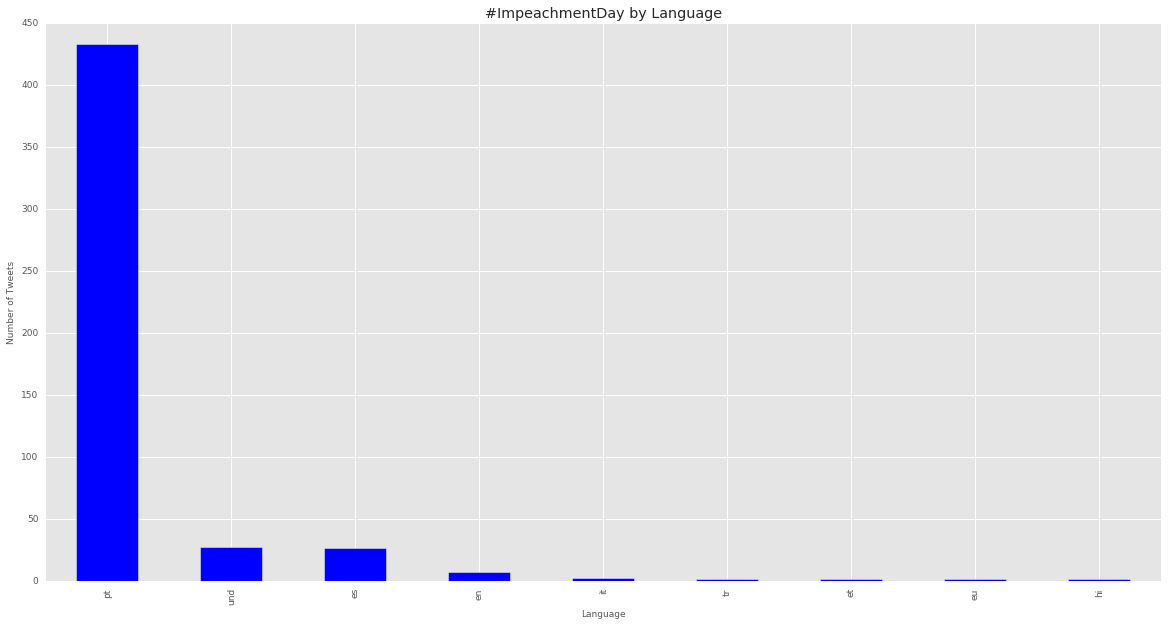

In [8]:
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    """
    :param category: Category plotted, can be tweets users, tweets language, tweets country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()

plot_tweets_per_category(tweets['lang'], "#ImpeachmentDay by Language", 
                         "Language", 
                         "Number of Tweets", 
                         2000,
                         "mozsprint_per_language.png")


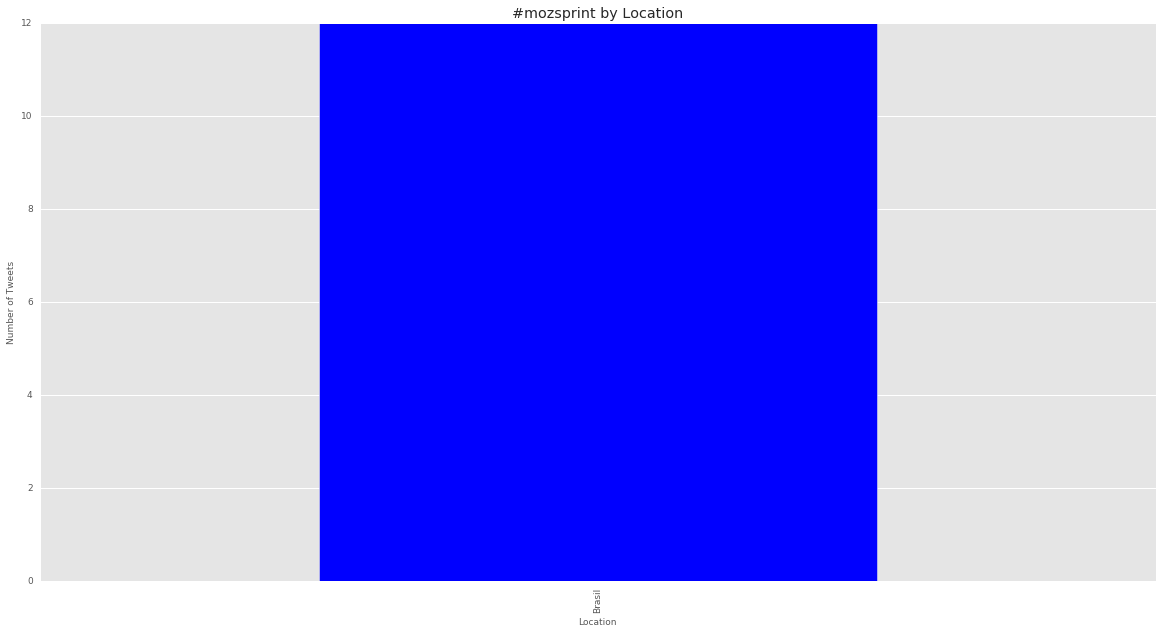

In [9]:
plot_tweets_per_category(tweets['Location'], 
                             "#mozsprint by Location", 
                             "Location", 
                             "Number of Tweets", 2000,
                             "mozsprint_per_location.png")

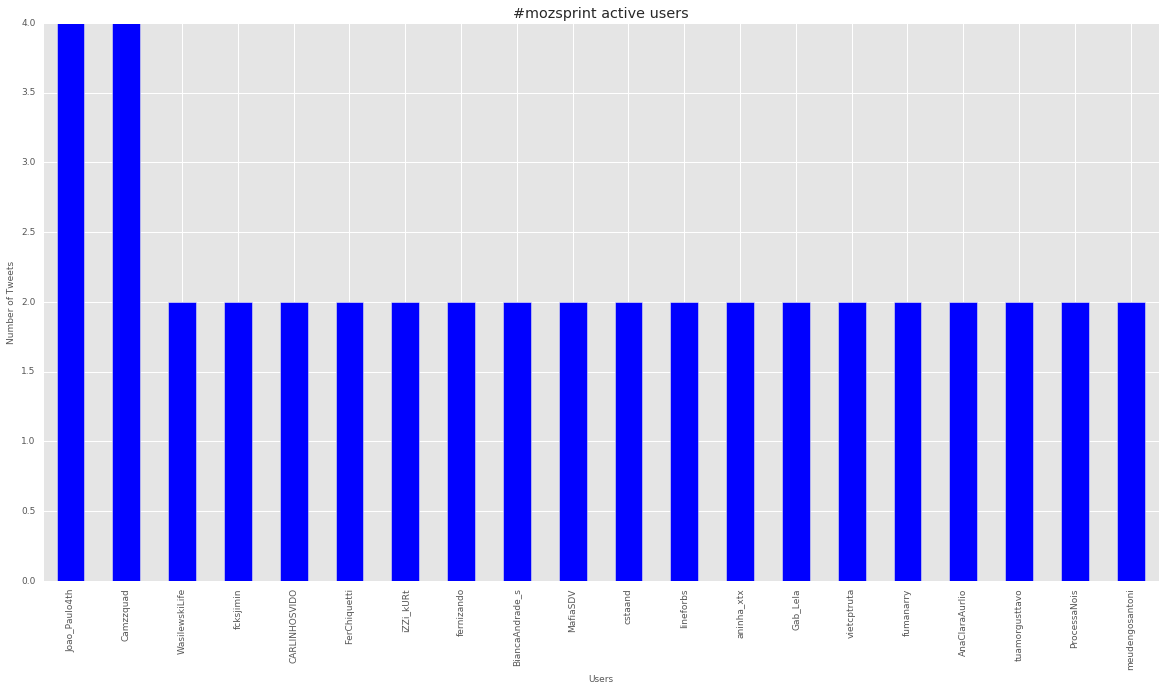

In [10]:
plot_tweets_per_category(tweets['user'], 
                             "#mozsprint active users", 
                             "Users", 
                             "Number of Tweets", 20,
                             "mozsprint_users.png")


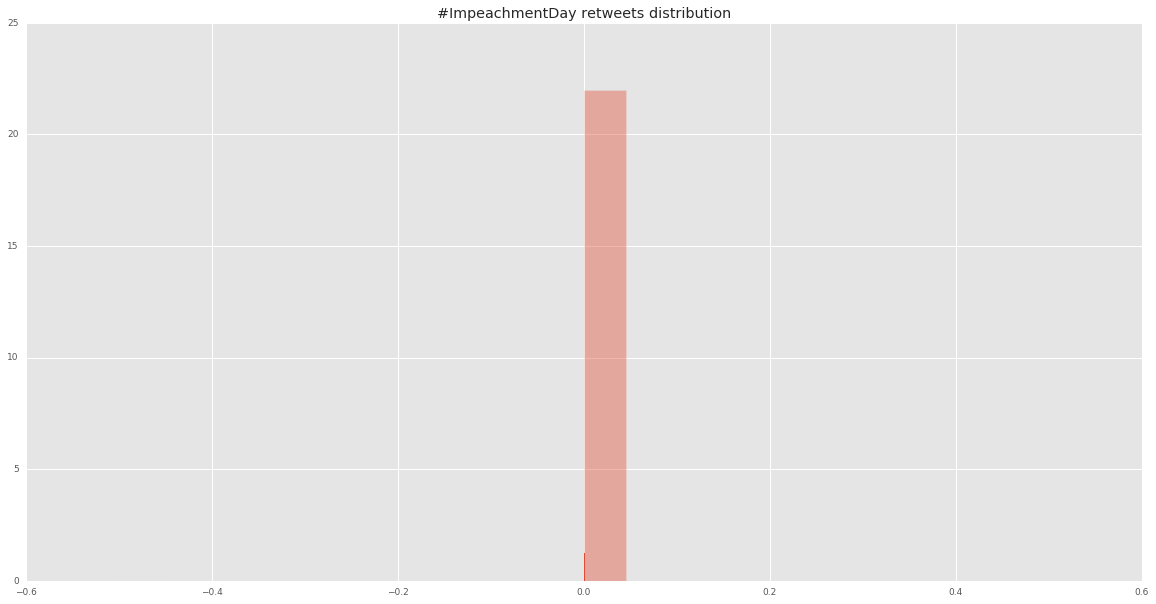

In [11]:
def plot_distribution(category, title, x_title, y_title, output_filename="plot.png"):
        """
        :param category: Category plotted, can be users, language, country etc ..
        :param title: Title of the plot
        :param x_title: List of the items in x
        :param y_title: Title of the variable plotted
        :return: a plot that we can save as pdf or png instead of displaying to the screen
        """
        fig, ax = plt.subplots()
        ax.tick_params(axis='x')
        ax.tick_params(axis='y')
        ax.set_xlabel(x_title)
        ax.set_ylabel(y_title)
        ax.set_title(title)
        sns.distplot(category.values, rug=True, hist=True);
        fig.savefig(output_filename)


plot_distribution(tweets['retweet_count'], 
                      "#ImpeachmentDay retweets distribution", "", "",
                      "retweets_distribution.png")

In [12]:
df = pd.DataFrame(tweets['created_at'].value_counts(), columns=['number_tweets'])
df['date'] = df.index
df.head()

days = [item.split(" ")[0] for item in df['date'].values]
df['days'] = days
grouped_tweets = df[['days', 'number_tweets']].groupby('days')
tweet_growth = grouped_tweets.sum()
tweet_growth['days']= tweet_growth.index

tweet_growth

,number_tweets,days


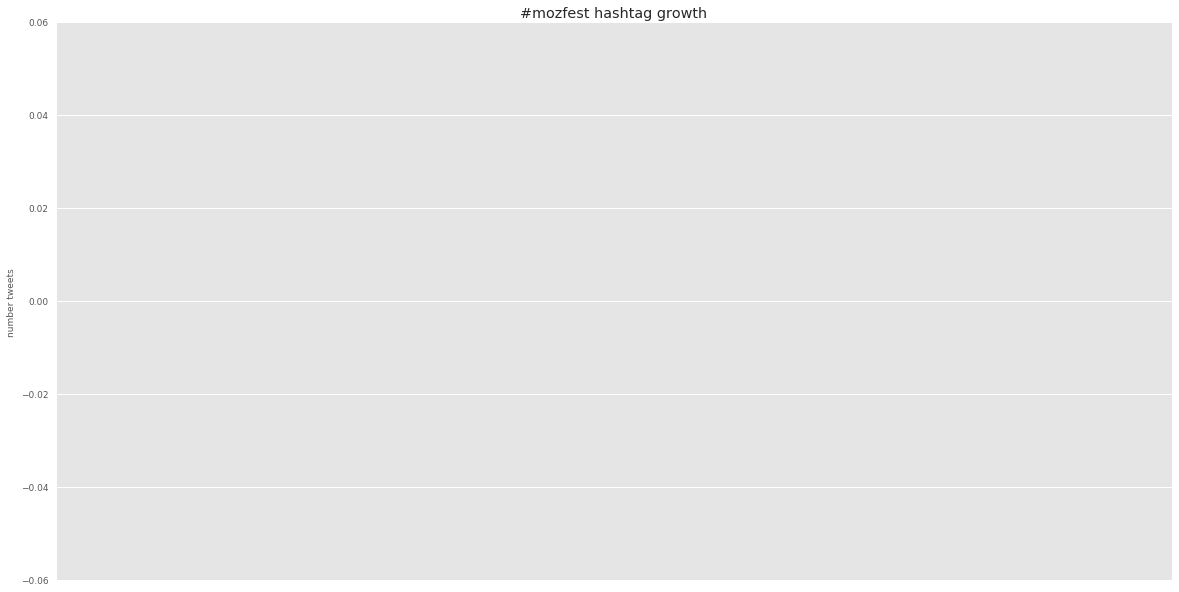

In [13]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
x_pos = np.arange(len(tweet_growth['days'].values))
ax.bar(x_pos, tweet_growth['number_tweets'].values, align='center')
ax.set_xticks(x_pos)
ax.set_title('#mozfest hashtag growth')
ax.set_ylabel("number tweets")
ax.set_xticklabels(tweet_growth['days'].values)
fig.savefig('mozfest_growth.png')

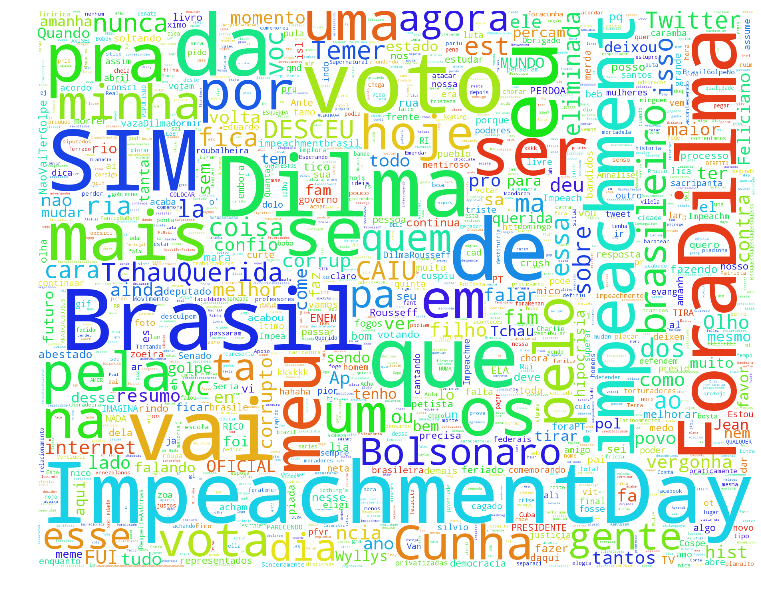

In [23]:
text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(background_color="white", max_words=2000,
                      stopwords=STOPWORDS, width=1800, height=1400).generate(no_urls_no_tags)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

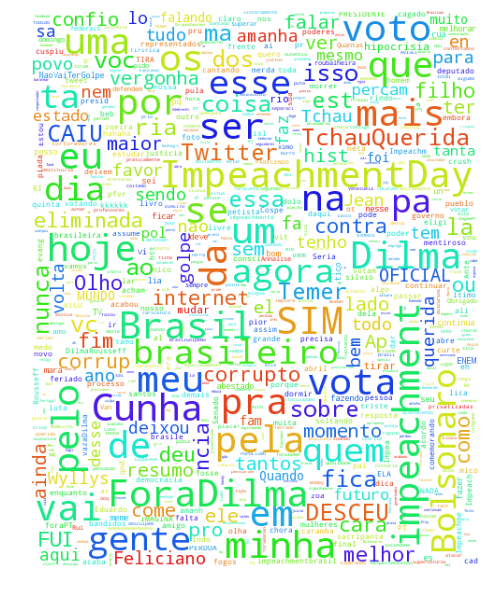

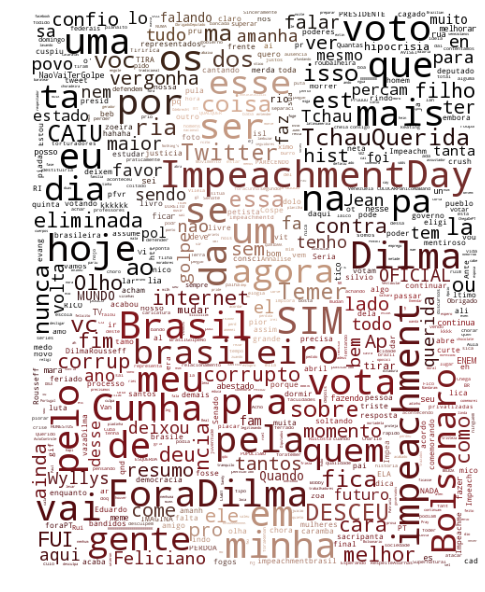

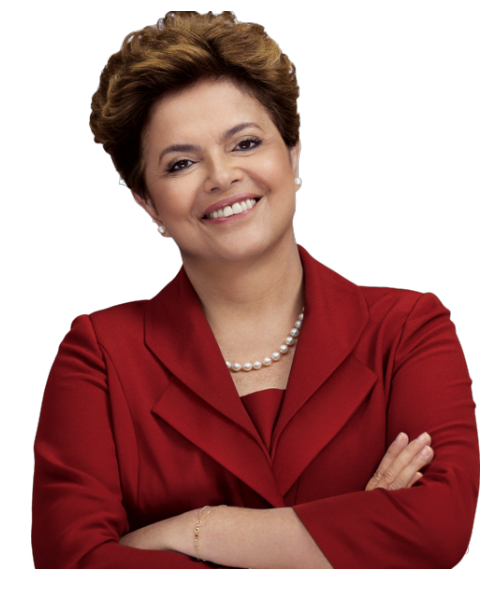

In [21]:
from os import path

text = " ".join(tweets['text'].values.astype(str))

no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

tweet_coloring = imread(path.join("dilma2.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=tweet_coloring,
               stopwords=STOPWORDS, max_font_size=40, random_state=42)

wc.generate(no_urls_no_tags)

image_colors = ImageColorGenerator(tweet_coloring)
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.savefig('mozsprint.png', dpi=300)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(tweet_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [ ]:
df = pd.DataFrame(tweets['created_at'].value_counts())
df['hour'] = df.index

hours = [item.split(" ")[0] for item in df['hour'].values]
df['hours'] = hours
grouped_tweets = df[['hours']].groupby('hours')
tweet_growth = grouped_tweets.sum()
tweet_growth['hours']= tweet_growth.index

tweet_growth
df.info()
df.tail()

In [ ]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='mediumspringgreen')
plt.grid()


In [ ]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

In [ ]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
# tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
# tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

# print tweets['FicaQuerida'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

# hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True]]
#                       tweets['BrasilContraOGolpe'].value_counts()[True],
#                       tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(9,9))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.03, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc=(1,.6))
plt.axis('equal')
plt.show()

In [ ]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text('nao', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet) 
                                          or word_in_text('nao', tweet))

# print tweets['nao'].value_counts()[True]
# print tweets['sim'].value_counts()[True]
# print tweets['ImpeachmentDay'].value_counts()[True]

# print tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe']
tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]]

x_pos = list(range(len(hashtags)))
width = 0.7
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_pos, tweets_by_hashtags, width, alpha=1, color='sienna')
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=20)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe (Votação SIM x NÃO)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

In [ ]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

In [ ]:
tweets['moro'] = tweets['text'].apply(lambda tweet: word_in_text('moro', tweet))
tweets['cunha'] = tweets['text'].apply(lambda tweet: word_in_text('cunha', tweet))
tweets['bolsonaro'] = tweets['text'].apply(lambda tweet: word_in_text('bolsonaro', tweet))
tweets['lula'] = tweets['text'].apply(lambda tweet: word_in_text('lula', tweet))
tweets['temer'] = tweets['text'].apply(lambda tweet: word_in_text('temer', tweet))
tweets['feliciano'] = tweets['text'].apply(lambda tweet: word_in_text('feliciano', tweet))

hashtags = ['Sérgio Moro'.decode('utf-8'), 'Eduardo Cunha', 'Jair Bolsonaro', 'Lula', 'Michel Temer', 'Marcos Feliciano']
tweets_by_hashtags = [tweets['moro'].value_counts()[True],
                      tweets['cunha'].value_counts()[True],
                      tweets['bolsonaro'].value_counts()[True],
                      tweets['lula'].value_counts()[True],
                      tweets['feliciano'].value_counts()[True],
                      tweets['temer'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff', 'mediumturquoise']
explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc='best')
plt.axis('equal')
plt.show()

In [ ]:
import io, json

def twitter_search(q, max_results=1000, **kw):
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(10000, max_results)
    
    for _ in range(10):
        try:
            next_results = search_results['search_metadata']['next_resuts']
        except KeyError, e:
            break
            
        kwargs = dict([ kv.split('=')
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results:
            break
            
    return statuses

twitter_api = oauth_login()

q = 'ForaInternetLimitada'
results = twitter_search(twitter_api, q, max_results=1000)

print json.dumps(results[0], indent=1)
                    
    

In [ ]:
def save_json(filename, data):
    with io.open('data/{0}.json'.format(filename),
                 'w', encoding='utf-8') as f:
            f.write(unicode(json.dumps(data, ensure_ascii=False)))
    
def load_json(filename):
    with io.open('data/{0}.json'.format(filename),
                  encoding='utf-8') as f:
            return f.read()

q = 'ForaInternetLimitada'



twitter_api = oauth_login()
results = twitter_search(twitter_api, q, max_results=1000)

save_json(q, results)
results = load_json(q)

# print json.dumps(results, indent=1)

# print json.dumps(br_trends, indent=1)

